Populating the interactive namespace from numpy and matplotlib


F:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fmin']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,a,5,0.1,,,0,,No
1,b,5,0.1,,,0,10,No


FCN = 10.387013182671136 
 TOTAL NCALL = 64 
 NCALLS = 64 
 
 
 EDM = 1.9313890542083067e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,a,0.990894,0.0587697,,,0,,No
1,b,1.94501,0.0990814,,,0,10,No


{'edm': 1.9313890542083067e-06,
 'fval': 10.387013182671136,
 'has_accurate_covar': True,
 'has_covariance': True,
 'has_made_posdef_covar': False,
 'has_posdef_covar': True,
 'has_reached_call_limit': False,
 'has_valid_parameters': True,
 'hesse_failed': False,
 'is_above_max_edm': False,
 'is_valid': True,
 'nfcn': 64,
 'up': 1.0}
[{'error': 0.058769726729121397,
  'has_limits': True,
  'has_lower_limit': True,
  'has_upper_limit': False,
  'is_const': False,
  'is_fixed': False,
  'lower_limit': 0.0,
  'name': 'a',
  'number': 0,
  'upper_limit': None,
  'value': 0.9908935407181958},
 {'error': 0.09908144231339677,
  'has_limits': True,
  'has_lower_limit': True,
  'has_upper_limit': True,
  'is_const': False,
  'is_fixed': False,
  'lower_limit': 0.0,
  'name': 'b',
  'number': 1,
  'upper_limit': 10.0,
  'value': 1.9450148847762057}]


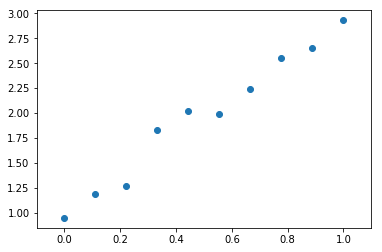

In [13]:
%pylab inline
from pprint import pprint
from iminuit import Minuit

def line(x,a,b):
    return a+x*b

data_x = linspace(0,1,10)
# 预先从正态分布计算随机数
offsets = array([-0.49783783, -0.33041722, -1.71800806, 1.60229399, 1.36682387,
                 -1.15424221, -0.91425267, -0.03395604, -1.27611719, -0.7004073 ])
data_y = line(data_x,1,2)+0.1*offsets  #生成具有随机偏移的数据点
plot(data_x,data_y,'o')
xlim(-0.1,1.1)

# 用最小二乘法（least_squares）拟合直线
# 计算对于给定a，b的 y偏差平方和
def least_squares(a,b):
    yvar = 0.01
    return sum ((data_y-line(data_x,a,b))**2/yvar)

m = Minuit(least_squares,a=5,b=5,error_a=0.1,error_b=0.1,
           limit_a=(0,None),limit_b=(0,10),errordef=1)    
    # 初始值 a=5,b=5; error命令即步长，均定为1
    # errordef=1用于正确生成最小二乘函数的参数不确定性估计值
    # 可以使用 m = Minuit(least_squares,pedantic=False)  直接使用默认值
    # limit命令使a，b的参数范围被限制为 a大于0 b在0到10之间
    # 可以通过fix命令使某个参数值固定，如 fix_a=True

m.print_param() # 检查当前参数设定，会生成表格

fmin,param = m.migrad()  # 拟合结果，生成表格
pprint(fmin)   # 拟合的情况
pprint(param)  # 拟合的结果 name参数名，value参数值，error参数的不确定性估计



In [14]:
fmin.fval/(len(data_y)-2)  #reduced chi2 理想情况下在1左右 

1.298376647833892

In [16]:
pprint(m.fval)  # 最小值处的函数值
pprint(m.migrad_ok()) # migrad结果是否有效

10.387013182671136
True


In [17]:
# 不确定性 置信区间
param = m.minos()
m.print_param()

Error,-0.05870261580988936,0.05884843215595304
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.09915706890347077,0.09901669881803556
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


(-0.1, 1.1)

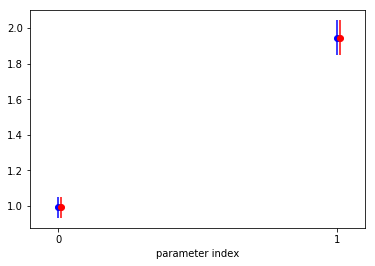

In [19]:
v = m.np_values()
ve = m.np_errors()
vm = m.np_merrors()

# 显示hesse误差
errorbar((0,1),v,ve,fmt='ob')

# 显示minos误差
errorbar((0.01,1.01),v,vm,fmt='or')

xlabel('parameter index')
xticks((0,1))
xlim(-0.1,1.1)

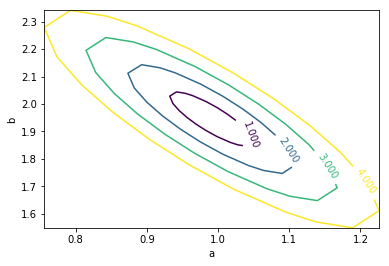

In [20]:
m.draw_mncontour('a','b',nsigma=4)